### **Information Theory** — _Claude Shannon_ (1948)

1. **Information** is defined as a quantity that reduces uncertainty.

2. The **information content** of an event is related to its **probability**. The less likely an event, the more information it carries when it occurs. $I(x) = -\log_{2}(p(x))$

3. **Entropy**: The average information content (or uncertainty) of a random variable.
    For a discrete random variable $X$ with probability distribution $p(x)$, entropy is defined as: $H(X) = - \sum p(x) \log_{2}(p(x))$. Higher entropy means greater randomness (or uncertainty).


Modern telegraph communication, ZIP file compression, JPEG image compression, cryptography, and more all stem from Shannon's information theory. The theory focuses on the statistical properties of data, without considering the semantics of the information or the computational cost of extracting it. For example,


- A SHA-256 encrypted key
- A national ID number

Shannon entropy was later extended to quantum information: qubits and quantum entropy.

An important point: from Shannon entropy's perspective, both examples above carry the same amount of information. But extracting their respective semantic information requires vastly different computational resources.

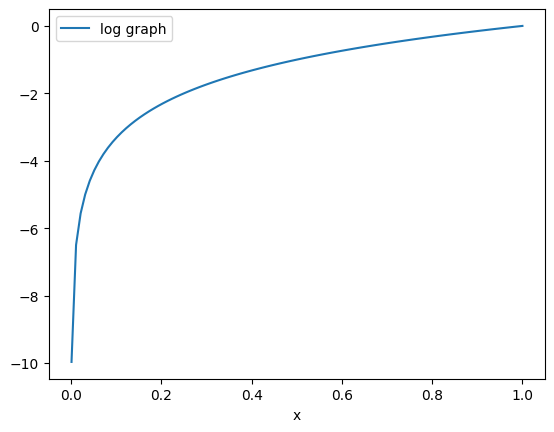

-0.3979400086720376 — log base 10 of 0.4
-0.916290731874155 — natural log (base e) of 0.4
-1.3219280948873622 — log base 2 of 0.4


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x values (non-negative values up to 1)
x = np.linspace(0.001, 1, 100)

# Define the function graph
y = np.log2(x)

# Plot the graph of y vs x
plt.plot(x, y, label='log graph')

# Add labels and legend
plt.xlabel('x')
plt.legend()

# Show the plot
plt.show()

print(f"{np.log10(0.4)} — log base 10 of 0.4")
print(f"{np.log(0.4)} — natural log (base e) of 0.4")
print(f"{np.log2(0.4)} — log base 2 of 0.4")

The log graph above shows the behavior of $\log_2(x)$ over the interval $(0, 1]$. Next, let's use code to build intuition for two things:

1. **Binary entropy function**: When a random variable has only two outcomes (like a coin flip), how does its entropy change with probability?
2. **Information content intuition**: How much information do events of different probabilities actually carry?

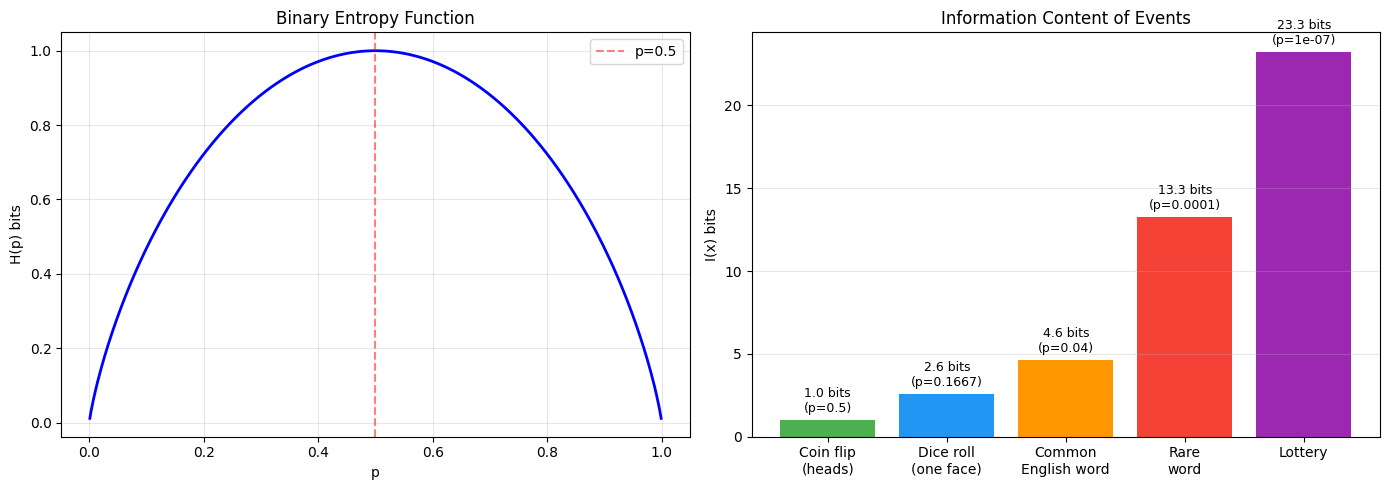

Fair coin (heads):  I = -log2(0.5)  = 1.0 bits
Dice (one face):    I = -log2(1/6)  = 2.58 bits
Winning lottery:    I = -log2(1e-7) = 23.3 bits

The left plot shows entropy is maximized at p=0.5 — maximum uncertainty means maximum information.
The right plot is intuitive: the rarer the event, the more information it carries when it happens.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Binary entropy function H(p) for a two-outcome random variable
p = np.linspace(0.001, 0.999, 500)
H = -p * np.log2(p) - (1 - p) * np.log2(1 - p)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: binary entropy curve
axes[0].plot(p, H, 'b-', linewidth=2)
axes[0].set_xlabel('p')
axes[0].set_ylabel('H(p) bits')
axes[0].set_title('Binary Entropy Function')
axes[0].axvline(x=0.5, color='r', linestyle='--', alpha=0.5, label='p=0.5')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right: information content of different events
events = {
    'Coin flip\n(heads)': 0.5,
    'Dice roll\n(one face)': 1/6,
    'Common\nEnglish word': 0.04,
    'Rare\nword': 0.0001,
    'Lottery': 1e-7,
}
names = list(events.keys())
probs = list(events.values())
info_content = [-np.log2(p_val) for p_val in probs]

colors = ['#4CAF50', '#2196F3', '#FF9800', '#F44336', '#9C27B0']
bars = axes[1].bar(names, info_content, color=colors)
axes[1].set_ylabel('I(x) bits')
axes[1].set_title('Information Content of Events')
axes[1].grid(True, alpha=0.3, axis='y')

for bar, val, prob in zip(bars, info_content, probs):
    axes[1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.3,
                 f'{val:.1f} bits\n(p={prob:.4g})', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# The key intuition: rarer events carry more information
print(f"Fair coin (heads):  I = -log2(0.5)  = {-np.log2(0.5):.1f} bits")
print(f"Dice (one face):    I = -log2(1/6)  = {-np.log2(1/6):.2f} bits")
print(f"Winning lottery:    I = -log2(1e-7) = {-np.log2(1e-7):.1f} bits")
print()
print("The left plot shows entropy is maximized at p=0.5 — maximum uncertainty means maximum information.")
print("The right plot is intuitive: the rarer the event, the more information it carries when it happens.")

### Mutual Information

For two discrete random variables $X$ and $Y$ (taking values $x_{i}$ and $y_{i}$), mutual information $I(X;Y)$ is defined as:

$$
I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p(x, y) \log_2 \left( \frac{p(x, y)}{p(x)p(y)} \right)
$$

For continuous random variables, the summation becomes an integral:

$$
I(X;Y) = \iint p(x, y) \log_2 \left( \frac{p(x, y)}{p(x)p(y)} \right) \, dx \, dy
$$

### Equivalent Forms of Mutual Information

Mutual information can be expressed using entropy and conditional entropy, with several equivalent definitions:

#### 1. Entropy-based definition:

$$
I(X;Y) = H(X) + H(Y) - H(X,Y)
$$

- $H(X)$: Entropy (uncertainty) of $X$.
- $H(Y)$: Entropy of $Y$.
- $H(X,Y)$: Joint entropy of $X$ and $Y$.
- **Meaning**: Mutual information is the sum of individual entropies minus the joint entropy, representing the redundant information between the two variables.

---

#### 2. Conditional entropy-based definition:

$$
I(X;Y) = H(X) - H(X|Y)
$$

- $H(X|Y)$: Conditional entropy of $X$ given $Y$.
- **Meaning**: Mutual information is the reduction in uncertainty about $X$ after observing $Y$.

Similarly:

$$
I(X;Y) = H(Y) - H(Y|X)
$$


- **Non-negativity**:
  - $I(X;Y) \geq 0$: Mutual information is always non-negative, because dependence cannot increase uncertainty.
  - When $X$ and $Y$ are independent, $I(X;Y) = 0$.


- **Upper bound**:
  - $I(X;Y) \leq H(X)$ and $I(X;Y) \leq H(Y)$: Mutual information cannot exceed the entropy of either variable.
  - If $X = Y$ (perfectly correlated), then $I(X;Y) = H(X) = H(Y)$.


- **Symmetry**:
  - $I(X;Y) = I(Y;X)$: Mutual information does not depend on the order of variables.


- **Units**:
  - When computed with $\log_2$, the unit is bits;
  - When using natural log ($\ln$), the unit is nats.

Above we listed the mathematical definition of mutual information and its equivalent forms. Let's compute a concrete example and draw the classic Venn diagram showing the relationships between $H(X)$, $H(Y)$, $H(X,Y)$, $H(X|Y)$, and $I(X;Y)$.

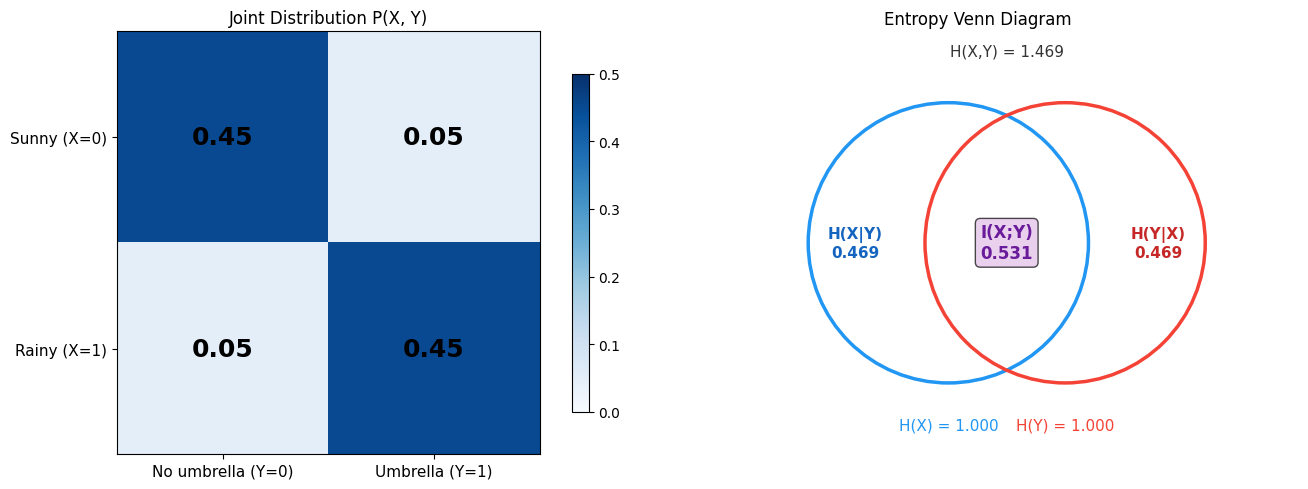

In this example, X is weather (sunny/rainy) and Y is whether someone carries an umbrella.
Weather uncertainty    H(X)   = 1.0000 bits
Umbrella uncertainty   H(Y)   = 1.0000 bits
Joint uncertainty      H(X,Y) = 1.4690 bits
Mutual information     I(X;Y) = 0.5310 bits

If I already know someone is carrying an umbrella, my uncertainty about the weather
drops from 1.000 to 0.469 bits.
That's the intuition behind mutual information — how much knowing one variable reduces uncertainty about the other.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Weather(X) vs Umbrella(Y)
# X: 0=sunny, 1=rainy | Y: 0=no umbrella, 1=umbrella
p_xy = np.array([
    [0.45, 0.05],  # sunny: no umbrella=0.45, umbrella=0.05
    [0.05, 0.45],  # rainy: no umbrella=0.05, umbrella=0.45
])

p_x = p_xy.sum(axis=1)
p_y = p_xy.sum(axis=0)

H_X = -np.sum(p_x * np.log2(p_x))
H_Y = -np.sum(p_y * np.log2(p_y))
H_XY = -np.sum(p_xy * np.log2(p_xy + 1e-10))
H_X_given_Y = H_XY - H_Y
H_Y_given_X = H_XY - H_X
I_XY = H_X + H_Y - H_XY

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: joint distribution heatmap
im = axes[0].imshow(p_xy, cmap='Blues', vmin=0, vmax=0.5)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No umbrella (Y=0)', 'Umbrella (Y=1)'], fontsize=11)
axes[0].set_yticks([0, 1])
axes[0].set_yticklabels(['Sunny (X=0)', 'Rainy (X=1)'], fontsize=11)
axes[0].set_title('Joint Distribution P(X, Y)')
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, f'{p_xy[i,j]:.2f}', ha='center', va='center',
                     fontsize=18, fontweight='bold')
plt.colorbar(im, ax=axes[0], shrink=0.8)

# Right: Venn diagram of entropy relationships
ax = axes[1]
ax.set_xlim(-2, 3.5)
ax.set_ylim(-1.8, 1.8)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Entropy Venn Diagram')

circle_x = plt.Circle((0.5, 0), 1.2, fill=False, edgecolor='#2196F3', linewidth=2.5)
circle_y = plt.Circle((1.5, 0), 1.2, fill=False, edgecolor='#F44336', linewidth=2.5)
ax.add_patch(circle_x)
ax.add_patch(circle_y)

ax.text(-0.3, 0, f'H(X|Y)\n{H_X_given_Y:.3f}', ha='center', va='center',
        fontsize=11, color='#1565C0', fontweight='bold')
ax.text(1.0, 0, f'I(X;Y)\n{I_XY:.3f}', ha='center', va='center',
        fontsize=12, color='#6A1B9A', fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='#E1BEE7', alpha=0.7))
ax.text(2.3, 0, f'H(Y|X)\n{H_Y_given_X:.3f}', ha='center', va='center',
        fontsize=11, color='#C62828', fontweight='bold')
ax.text(0.5, -1.6, f'H(X) = {H_X:.3f}', ha='center', fontsize=11, color='#2196F3')
ax.text(1.5, -1.6, f'H(Y) = {H_Y:.3f}', ha='center', fontsize=11, color='#F44336')
ax.text(1.0, 1.6, f'H(X,Y) = {H_XY:.3f}', ha='center', fontsize=11, color='#333')

plt.tight_layout()
plt.show()

print("In this example, X is weather (sunny/rainy) and Y is whether someone carries an umbrella.")
print(f"Weather uncertainty    H(X)   = {H_X:.4f} bits")
print(f"Umbrella uncertainty   H(Y)   = {H_Y:.4f} bits")
print(f"Joint uncertainty      H(X,Y) = {H_XY:.4f} bits")
print(f"Mutual information     I(X;Y) = {I_XY:.4f} bits")
print()
print(f"If I already know someone is carrying an umbrella, my uncertainty about the weather")
print(f"drops from {H_X:.3f} to {H_X_given_Y:.3f} bits.")
print("That's the intuition behind mutual information — how much knowing one variable reduces uncertainty about the other.")

### Applications in Machine Learning

- Feature selection: Choose features with the highest mutual information with the target variable.
- Information bottleneck: Optimize models to compress input information while preserving mutual information with the output.
- Language modeling: Measure semantic dependencies between words.


1. **Relationships between tokens**:

  - In a Transformer, the input is a sequence of tokens (e.g., words or subwords). Through self-attention, each token updates its representation based on other tokens in the context. Attention scores reflect the importance and dependency between tokens.

  - From an information-theoretic perspective, the mutual information $I(X_i; X_j)$ between two tokens can be understood as: how much observing $X_j$ (one token's representation) reduces uncertainty about $X_i$ (another token's representation).

  - For example, in the sentence "The cat sat on the mat", "cat" and "sat" are linked through the attention mechanism. If "sat" provides contextual information about "cat" (e.g., subject-verb relationship), their mutual information is greater than zero.

2. **How attention reflects mutual information**:

  - Self-attention computes each token's weighted contribution to other tokens. The weights (post-softmax attention scores) can be seen as an approximation of conditional probability: $P(X_i \mid X_j)$. Computing mutual information involves the ratio of joint distribution $p(X_i, X_j)$ to the product of marginal distributions $p(X_i)p(X_j)$, and the attention mechanism implicitly captures this dependency.

  - Specifically, the attention mechanism quantifies the correlation between tokens through the dot product of Keys, Queries, and Values — this is similar in spirit to how mutual information measures shared information between variables.

3. **Sampling and modeling**:

  - During training or inference, token sequences are progressively refined through multi-layer attention mechanisms. Each layer's output can be seen as enhanced extraction of mutual information between input tokens. For example, after multiple Transformer layers, the representations of "cat" and "mat" may contain more shared information about their semantic relationship.


_The attention mechanism in Transformers does not directly compute mutual information. Instead, it captures dependencies indirectly through parameterization (weight matrices) and training objectives (e.g., cross-entropy loss for language modeling). It is an approximation or practical implementation of mutual information, not a strict mathematical computation._

- The Transformer training objective is typically to minimize cross-entropy loss, which is equivalent to minimizing the KL divergence between the predicted distribution and the true distribution.
- $H(Y \mid X)$ (conditional entropy) represents the uncertainty when the language model predicts the next token, while mutual information $I(X;Y)$ reflects how much context $X$ helps predict $Y$.
- Information theory can inspire more efficient generation algorithms, e.g., optimizing coherence by maximizing $I(X_{t-1}; X_t)$.

- **Knowledge Distillation**:

  Mutual information can measure the amount of shared knowledge between teacher and student models. The distillation process tries to preserve the key parts of $I(X;Y)$.


- **LoRA and Fine-tuning**:

   LoRA (Low-Rank Adaptation) adjusts weights through low-rank updates, which may affect the mutual information distribution in representations. Information theory can help explain why LoRA is more efficient than full-parameter fine-tuning (e.g., preserving task-relevant mutual information).

Cross-entropy loss is the core objective function for LLM training. It has a clean relationship with KL divergence:

$$H(P, Q) = H(P) + D_{KL}(P \| Q)$$

In other words, cross-entropy = true entropy + KL divergence. Minimizing cross-entropy during training is really about minimizing KL divergence — pushing the model's predicted distribution as close as possible to the true distribution. Let's verify this relationship with a character frequency example.

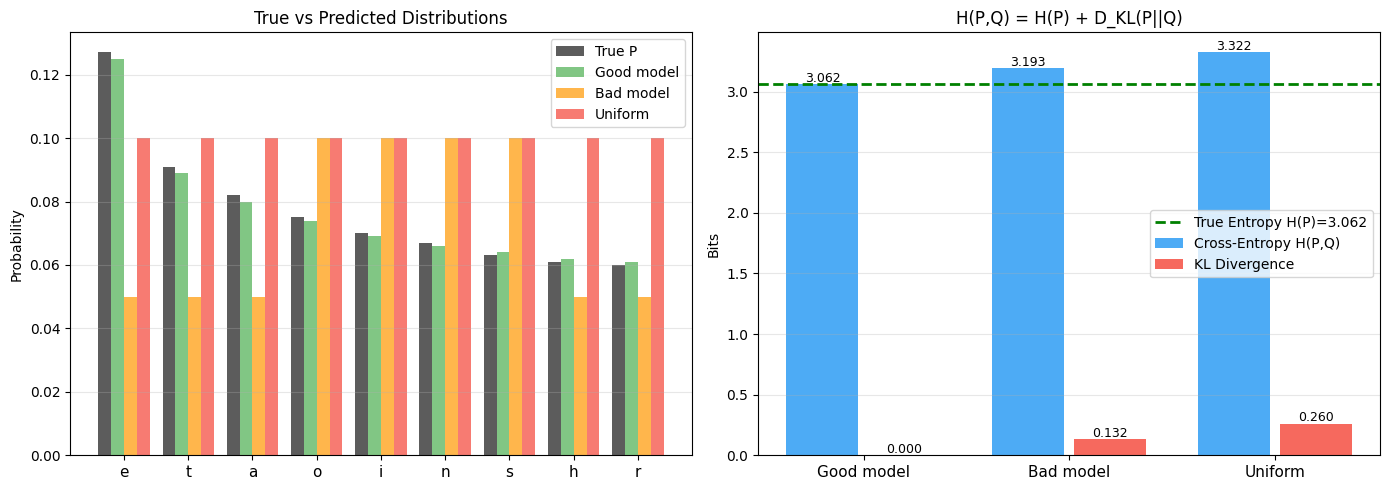

True distribution entropy H(P) = 3.0619 bits

  Good model: cross-entropy = 3.0622, KL divergence = 0.0002
    Verify: H(P) + D_KL = 3.0619 + 0.0002 = 3.0622
  Bad model: cross-entropy = 3.1935, KL divergence = 0.1316
    Verify: H(P) + D_KL = 3.0619 + 0.1316 = 3.1935
  Uniform: cross-entropy = 3.3219, KL divergence = 0.2600
    Verify: H(P) + D_KL = 3.0619 + 0.2600 = 3.3219

The closer a model's predictions are to the true distribution, the smaller the KL divergence and cross-entropy.
This is why LLMs use cross-entropy as their loss function — it directly measures the gap between the model and real language.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated English letter frequency distribution
chars = ['e', 't', 'a', 'o', 'i', 'n', 's', 'h', 'r', 'other']
p_true = np.array([0.127, 0.091, 0.082, 0.075, 0.070, 0.067, 0.063, 0.061, 0.060, 0.304])

# Three "model" predictions with different quality
q_good    = np.array([0.125, 0.089, 0.080, 0.074, 0.069, 0.066, 0.064, 0.062, 0.061, 0.310])
q_bad     = np.array([0.050, 0.050, 0.050, 0.100, 0.100, 0.100, 0.100, 0.050, 0.050, 0.350])
q_uniform = np.ones(len(chars)) / len(chars)

# Sanity check: all distributions must sum to 1
for name, dist in [('p_true', p_true), ('q_good', q_good), ('q_bad', q_bad)]:
    assert abs(dist.sum() - 1.0) < 1e-9, f"{name} sums to {dist.sum()}, not 1.0"

def cross_entropy(p, q):
    return -np.sum(p * np.log2(q + 1e-10))

def kl_divergence(p, q):
    return np.sum(p * np.log2((p + 1e-10) / (q + 1e-10)))

def entropy(p):
    return -np.sum(p * np.log2(p + 1e-10))

H_p = entropy(p_true)
distributions = {'Good model': q_good, 'Bad model': q_bad, 'Uniform': q_uniform}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: compare distributions (show top 9 characters)
x_pos = np.arange(len(chars) - 1)
width = 0.2
axes[0].bar(x_pos - 1.5*width, p_true[:-1], width, label='True P', color='#333', alpha=0.8)
axes[0].bar(x_pos - 0.5*width, q_good[:-1], width, label='Good model', color='#4CAF50', alpha=0.7)
axes[0].bar(x_pos + 0.5*width, q_bad[:-1], width, label='Bad model', color='#FF9800', alpha=0.7)
axes[0].bar(x_pos + 1.5*width, q_uniform[:-1], width, label='Uniform', color='#F44336', alpha=0.7)
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(chars[:-1], fontsize=11)
axes[0].set_ylabel('Probability')
axes[0].set_title('True vs Predicted Distributions')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# Right: cross-entropy and KL divergence comparison
labels = list(distributions.keys())
ce_vals = [cross_entropy(p_true, q) for q in distributions.values()]
kl_vals = [kl_divergence(p_true, q) for q in distributions.values()]

x_pos2 = np.arange(len(labels))
bars1 = axes[1].bar(x_pos2 - 0.2, ce_vals, 0.35, label='Cross-Entropy H(P,Q)', color='#2196F3', alpha=0.8)
bars2 = axes[1].bar(x_pos2 + 0.2, kl_vals, 0.35, label='KL Divergence', color='#F44336', alpha=0.8)
axes[1].axhline(y=H_p, color='green', linestyle='--', linewidth=2, label=f'True Entropy H(P)={H_p:.3f}')
axes[1].set_xticks(x_pos2)
axes[1].set_xticklabels(labels, fontsize=11)
axes[1].set_ylabel('Bits')
axes[1].set_title('H(P,Q) = H(P) + D_KL(P||Q)')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars1, ce_vals):
    axes[1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
                 f'{val:.3f}', ha='center', fontsize=9)
for bar, val in zip(bars2, kl_vals):
    axes[1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
                 f'{val:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"True distribution entropy H(P) = {H_p:.4f} bits\n")
for name, q in distributions.items():
    ce = cross_entropy(p_true, q)
    kl = kl_divergence(p_true, q)
    print(f"  {name}: cross-entropy = {ce:.4f}, KL divergence = {kl:.4f}")
    print(f"    Verify: H(P) + D_KL = {H_p:.4f} + {kl:.4f} = {H_p + kl:.4f}")
print()
print("The closer a model's predictions are to the true distribution, the smaller the KL divergence and cross-entropy.")
print("This is why LLMs use cross-entropy as their loss function — it directly measures the gap between the model and real language.")

Above we mentioned that the self-attention mechanism quantifies dependencies between tokens via the $Q \cdot K^T$ dot product, which is similar in spirit to how mutual information measures shared information between variables. Let's visualize this — using the sentence "The cat sat on the mat", we'll look at the attention matrix and approximate the mutual information between tokens.

transformers/torch not installed, using simulated data
To use a real model: pip install transformers torch



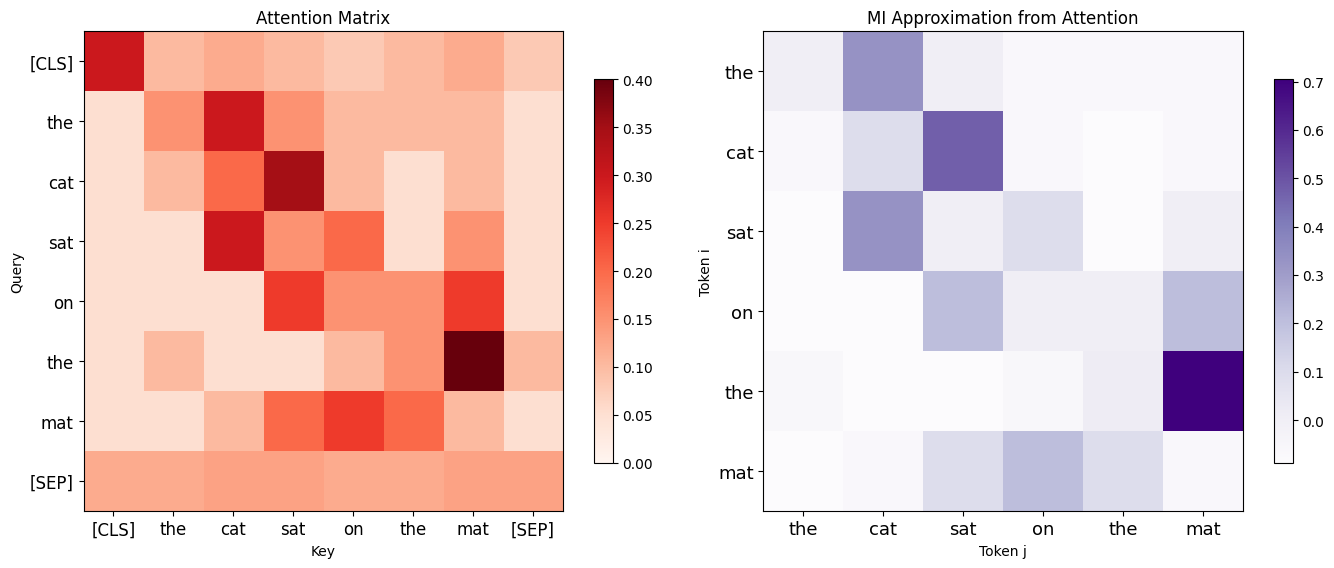

The left plot is the attention matrix — each cell shows how much one token attends to another.
The right plot approximates mutual information from the attention weights — darker means stronger semantic association.

For example, 'cat' and 'sat' have high mutual information (subject-verb), as do 'on' and 'mat' (prepositional).
The attention mechanism doesn't directly compute mutual information, but through the Q*K dot product,
it implicitly captures a similar dependency structure.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Try loading a pretrained model; fall back to simulated data if unavailable
use_model = False
try:
    from transformers import AutoTokenizer, AutoModel
    import torch
    model_name = "bert-base-uncased"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name, output_attentions=True)

    text = "The cat sat on the mat"
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    # Take the last layer's attention, averaged across all heads
    attention = outputs.attentions[-1].squeeze(0).mean(dim=0).numpy()
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    use_model = True
    print("Loaded bert-base-uncased model\n")
except Exception:
    print("transformers/torch not installed, using simulated data")
    print("To use a real model: pip install transformers torch\n")

    tokens = ['[CLS]', 'the', 'cat', 'sat', 'on', 'the', 'mat', '[SEP]']
    # Simulated attention pattern based on linguistic intuition
    attention = np.array([
        [0.30, 0.10, 0.12, 0.10, 0.08, 0.10, 0.12, 0.08],  # CLS -> global
        [0.05, 0.15, 0.30, 0.15, 0.10, 0.10, 0.10, 0.05],  # the -> cat (determiner)
        [0.05, 0.10, 0.20, 0.35, 0.10, 0.05, 0.10, 0.05],  # cat -> sat (subject-verb)
        [0.05, 0.05, 0.30, 0.15, 0.20, 0.05, 0.15, 0.05],  # sat -> cat, on
        [0.05, 0.05, 0.05, 0.25, 0.15, 0.15, 0.25, 0.05],  # on -> sat, mat
        [0.05, 0.10, 0.05, 0.05, 0.10, 0.15, 0.40, 0.10],  # the -> mat (determiner)
        [0.05, 0.05, 0.10, 0.20, 0.25, 0.20, 0.10, 0.05],  # mat -> on, sat
        [0.12, 0.12, 0.13, 0.13, 0.12, 0.12, 0.13, 0.13],  # SEP -> global
    ])

fig, axes = plt.subplots(1, 2, figsize=(14, 5.5))

# Left: attention heatmap
im = axes[0].imshow(attention, cmap='Reds', vmin=0)
axes[0].set_xticks(range(len(tokens)))
axes[0].set_yticks(range(len(tokens)))
axes[0].set_xticklabels(tokens, fontsize=12)
axes[0].set_yticklabels(tokens, fontsize=12)
axes[0].set_xlabel('Key')
axes[0].set_ylabel('Query')
axes[0].set_title('Attention Matrix')
plt.colorbar(im, ax=axes[0], shrink=0.8)

# Right: approximate mutual information from attention weights
# Strip [CLS] and [SEP], focus on content tokens
content_tokens = tokens[1:-1]
content_attn = attention[1:-1, 1:-1]
content_attn_norm = content_attn / content_attn.sum(axis=1, keepdims=True)

n = len(content_tokens)
uniform = np.ones(n) / n
mi_approx = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if content_attn_norm[i, j] > 0:
            mi_approx[i, j] = content_attn_norm[i, j] * np.log2(
                content_attn_norm[i, j] / uniform[j])

im2 = axes[1].imshow(mi_approx, cmap='Purples')
axes[1].set_xticks(range(n))
axes[1].set_yticks(range(n))
axes[1].set_xticklabels(content_tokens, fontsize=13)
axes[1].set_yticklabels(content_tokens, fontsize=13)
axes[1].set_xlabel('Token j')
axes[1].set_ylabel('Token i')
axes[1].set_title('MI Approximation from Attention')
plt.colorbar(im2, ax=axes[1], shrink=0.8)

plt.tight_layout()
plt.show()

print("The left plot is the attention matrix — each cell shows how much one token attends to another.")
print("The right plot approximates mutual information from the attention weights — darker means stronger semantic association.")
print()
print("For example, 'cat' and 'sat' have high mutual information (subject-verb), as do 'on' and 'mat' (prepositional).")
print("The attention mechanism doesn't directly compute mutual information, but through the Q*K dot product,")
print("it implicitly captures a similar dependency structure.")

### **V-Information Theory**
https://arxiv.org/abs/2002.10689

V-information theory argues that the "amount" of information depends not only on the statistical properties of the data, but also on how easy it is to extract that information given limited computational resources.

V-information theory introduces the concept of **computational complexity**. That is: if extracting information requires more computational resources, then the information content of that representation is effectively **"less"** in practice.

In AI, among the information stored in embeddings and weights, which parts are "useful information"? This can be measured by how easy or hard it is to extract them with limited computational resources. For example:

- Why can methods like model distillation or LoRA preserve more useful information? (They optimize information extraction efficiency)
- Why is the self-attention mechanism more efficient than other architectures? (Better at "decoding" available information)

__Principle__:
Through a model family $V$ (called "probes" in the paper), which contains a finite set of extraction methods available to the observer — simple linear models, Transformer-based neural networks, etc. — one **estimates conditional entropy (CE)** error. In other words, take the prediction error of the best model.

Currently this has mainly heuristic value, useful for comparing which modeling approaches might be more efficient. See the original paper for details.

### Summary

Traditional Shannon information theory deals with static statistical data. V-information theory introduces a subjective factor — the observer's computational resources — creating a dynamic framework for information processing.

### Thermodynamic Laws

Processing information requires energy — for instance, erasing 1 bit of information requires a minimum energy expenditure. This binds computation to physical limits.

__Example:__
"Changing the number of electrons in an atom requires photon energy to knock out electrons"


The process of extracting and processing information is subject to constraints analogous to the laws of thermodynamics. Consequently, __the information we can extract from training data is fundamentally bounded__.
For a given training set, no matter what method is used (LoRA, distillation, SFT, Mamba, Transformer), this limit cannot be exceeded. These methods can only optimize extraction efficiency — they cannot **create** new information.

### Another Way to Understand Entropy: Is Compression "Intelligence"?

Shannon's entropy formula defines the optimal compression limit for data — the entropy:

$$
H(X) = - \sum_{i=1}^{n} p(x_{i}) \log_{2} p(x_{i})
$$

It is the theoretical lower bound for lossless compression. For example, the minimum encoding length of many compression algorithms cannot go below the entropy value.

A brief history of compression techniques (1950-2025):
- Shannon-Fano Coding: Assigns shorter codes to high-frequency symbols and longer codes to low-frequency symbols.
- Huffman Coding: Similar approach with binary tree optimization, getting closer to the Shannon entropy limit.
- Dictionary encoding: Finds repeated patterns through sliding windows, replacing redundant sequences with pointers and lengths. Later evolved into dynamic dictionaries. (ZIP, gzip)
- Arithmetic coding: Encodes the entire message as a single fraction, theoretically closer to the Shannon entropy limit but computationally complex.
- Discrete Cosine Transform (DCT): Achieves high lossy compression by removing high-frequency details imperceptible to the human eye. (JPEG)
- Huffman-based audio compression: Uses psychoacoustic models to remove parts inaudible to the human ear for lossy compression. (MP3)
- DCT + temporal dimension: Combines inter-frame prediction with DCT for video compression. (MPEG, DVD, digital TV)
- Neural network compression:
    - Autoencoders
    - RNN
    - Transformer

### The Limits of Universal Compression?

What are the boundaries of Shannon entropy's limits? By incorporating semantic information, can compression not only remove redundancy but also maximize preservation of task-relevant content?

Above we discussed how Shannon entropy defines the theoretical lower bound for lossless compression. This isn't just theory — we can verify it with code. Let's compress texts with different entropy levels and see how the actual compression ratio relates to entropy.

In [6]:
import zlib
import math
import numpy as np

def entropy_per_char(text):
    """Compute per-character entropy in bits"""
    freq = {}
    for ch in text:
        freq[ch] = freq.get(ch, 0) + 1
    n = len(text)
    return -sum((c/n) * math.log2(c/n) for c in freq.values())

texts = {
    'Repeated':  'aaaa' * 250,
    'English':   'the cat sat on the mat and the dog lay on the rug ' * 20,
    'Mixed':     'Information theory connects probability to communication ' * 20,
    'Random':    ''.join(chr(np.random.randint(65, 91)) for _ in range(1000)),
}

for name, text in texts.items():
    raw = text.encode('utf-8')
    compressed = zlib.compress(raw, 9)
    ratio = len(compressed) / len(raw)
    h = entropy_per_char(text)
    print(f"{name:>10}: {len(raw):>5}B -> {len(compressed):>5}B  "
          f"(compression ratio {ratio:.1%}, entropy {h:.2f} bits/char)")

print()
print("Low-entropy repeated text can be compressed to almost nothing, while high-entropy random strings barely compress at all.")
print("This is the physical meaning of Shannon entropy: it measures the 'true information content' in the data.")
print("From this perspective, training a language model is really about learning a compressed representation of language —")
print("better predictions mean better compression.")

  Repeated:  1000B ->    17B  (compression ratio 1.7%, entropy -0.00 bits/char)
   English:  1000B ->    54B  (compression ratio 5.4%, entropy 3.47 bits/char)
     Mixed:  1140B ->    71B  (compression ratio 6.2%, entropy 3.90 bits/char)
    Random:  1000B ->   633B  (compression ratio 63.3%, entropy 4.69 bits/char)

Low-entropy repeated text can be compressed to almost nothing, while high-entropy random strings barely compress at all.
This is the physical meaning of Shannon entropy: it measures the 'true information content' in the data.
From this perspective, training a language model is really about learning a compressed representation of language —
better predictions mean better compression.
